In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/drive/MyDrive/DSA WORKS/wee7/Advertising.csv')

data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

**1. Explain the dataset**


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


The data is having 200 rows and no null values in the data. the sample data is shown above.

**2.Check the summary statistics and discuss the max, min, avg, median,
and percentiles.**

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
variab=data.median()


median of the data is shown above

In [8]:
data.quantile([.25,.5,.75])

,TV,Radio,Newspaper,Sales
0.25,74.375,9.975,12.75,10.375
0.50,149.750,22.900,25.75,12.900
0.75,218.825,36.525,45.10,17.400


percentile of the data is shown above

In the above three table we can see the mininmum, maximum, Average, median and percetile of the data.

**3. Draw a scatter plot between TV and sales and write your insights**


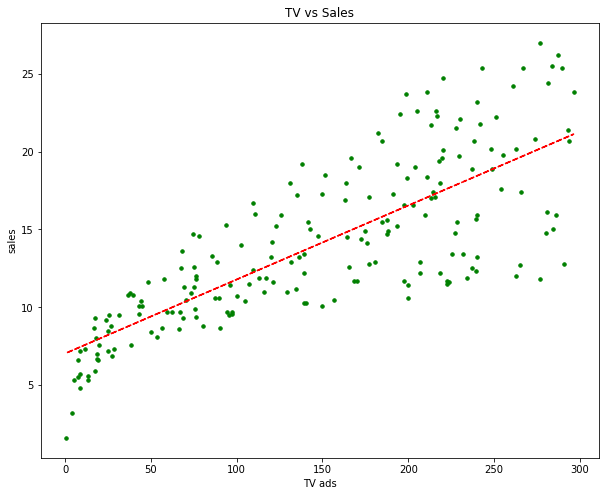

In [19]:

plt.figure(figsize=(10,8))
x=data['TV']
y=data['Sales']
plt.scatter(x,y,s=12,color='green')
plt.title('TV vs Sales')
plt.xlabel('TV ads')
plt.ylabel('sales')
Z = np.polyfit(x, y, 1)
P = np.poly1d(Z)
plt.plot(x,P(x),"r--")

From the above scatter plot we can say in general that the sales is getting increased preportional to tv ads.the data is getting spread on increasing the tv ads 

**4. Do a correlation analysis on the data set**

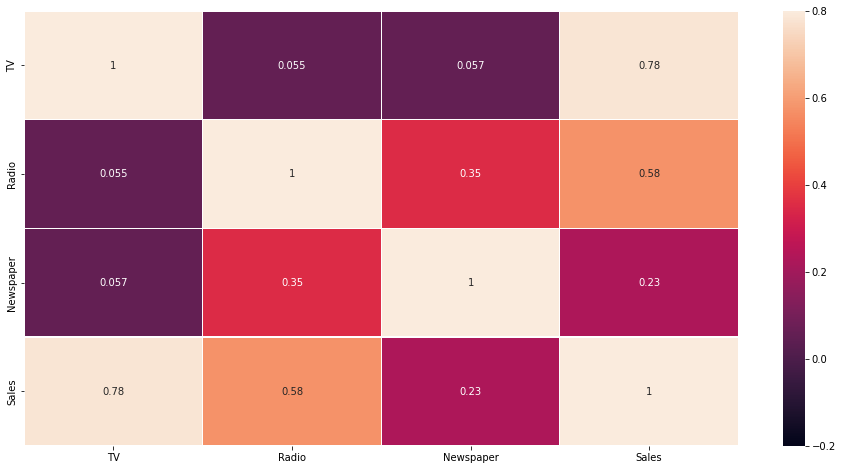

In [11]:
corrdata=data.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corrdata,vmin=-.2,vmax=0.8,annot=True,linewidths=0.2)


**5. Fit a linear regression model on the dataset**

In [13]:

y=data['Sales']
x=data.drop(['Sales'],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30,test_size=0.5)


In [14]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction = model.predict(x_test)
print(y_test)

143    10.4
81     12.3
26     15.0
150    16.1
124    19.7
       ... 
47     23.2
83     13.6
112    14.1
30     21.4
74     17.0
Name: Sales, Length: 100, dtype: float64


In [15]:
print(prediction)

[ 8.96517224 14.62435037 14.89804846 18.24386929 19.64814556  8.28788726
 10.984865   19.19185277  8.21356227 14.50443083 10.52632807 15.25980604
 14.62056851 11.97366133  6.42309297 18.39341231 20.92328745 13.16097386
 21.35727483 24.17504462 11.65831836 10.7505295  19.262106   12.66635203
 17.07395262 14.94527399  6.311146   23.49916278 13.97801264 14.65949756
 19.3890303  12.75132695 22.99437939 15.44566885 20.09003029 15.41852096
 12.63730787  9.98266908 18.2524461   8.26972161  9.28108075  5.95028979
  9.96379072 16.19638392 16.33515633 23.17004696 20.66546342  7.79756388
 20.60780465 11.07770939 15.90162903 17.79502513 23.16654488 12.50522585
 17.89371881 19.2571796  12.81663305 21.90200395 18.17460704 17.30704297
 13.03660928  3.86770871 10.50986282 10.48338459 21.1547391  12.46367816
  6.69200994 13.77510553 18.66008639 10.17078152 12.51799739 18.70586659
  4.80967483 10.03543938 14.23053467  8.89750849 18.46634915  7.83163282
 12.33933709 20.68018199 17.32260385  9.06394869 12

In [16]:
from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(y_test,prediction))

MSE is 2.5855122272489655


In [11]:
import statsmodels.formula.api as sm
data2 = sm.ols(formula="Sales~TV+Radio+Newspaper", data=data).fit()
print(data2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           1.58e-96
Time:                        14:45:53   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0